In [1]:
#Nota la base tenia mas de 800 000 registros y pesaba casi 700 megas por lo que solo pude ocupar 10 000 para el proyecto

import json
import requests
import feedparser
import pymysql
from sqlalchemy import create_engine
from pandas.io.json import json_normalize
import random
from plotly import plotly
import cufflinks as cf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly import plotly
import cufflinks as cf



#Pagina de api
#https://datos.cdmx.gob.mx/explore/dataset/carpetas-de-investigacion-pgj-cdmx/api/?rows=5000&sort=&refine.ao_hechos=2018    
url = 'https://datos.cdmx.gob.mx/api/records/1.0/search/?dataset=carpetas-de-investigacion-pgj-cdmx&rows=10000&start=0&facet=ao_hechos&facet=mes_hechos&facet=delito&facet=categoria_delito&facet=fiscalia&facet=colonia_hechos&facet=alcaldia_hechos'

response = requests.get(url)
response #Nos aseguramos que la respuesta sea un Ok 200!!!!!

<Response [200]>

In [2]:
response = response.json()
response

{'nhits': 808871,
 'parameters': {'dataset': ['carpetas-de-investigacion-pgj-cdmx'],
  'timezone': 'UTC',
  'rows': 10000,
  'start': 0,
  'format': 'json',
  'facet': ['ao_hechos',
   'mes_hechos',
   'delito',
   'categoria_delito',
   'fiscalia',
   'colonia_hechos',
   'alcaldia_hechos']},
 'records': [{'datasetid': 'carpetas-de-investigacion-pgj-cdmx',
   'recordid': '0ff90656947fb95f2acd6af896533ca6f5e3e42d',
   'fields': {'mes_hechos': 'Mayo',
    'calle_hechos2': 'PRESA DON MARTIN',
    'latitud': '19.4471959998338',
    'categoria_delito': 'ROBO DE VEHÍCULO CON Y SIN VIOLENCIA',
    'calle_hechos': 'PRESA DE LA AMISTAD',
    'alcaldia_hechos': 'MIGUEL HIDALGO',
    'unidad_investigacion': 'UI-2CD',
    'geopoint': [19.4471959998, -99.210664],
    'agencia': 'MH-2',
    'fecha_inicio': '2016-05-03 00:36:45',
    'fecha_hechos': '2016-05-01 21:00:00',
    'longitud': '-99.2106639999999',
    'colonia_hechos': 'LOMAS DE SOTELO',
    'delito': 'ROBO DE VEHICULO DE SERVICIO PARTICU

In [3]:
response1 = json_normalize(response['records'])

In [4]:
response1.to_csv('CIPGJ.csv', index=False)

In [5]:
response1 = pd.read_csv('CIPGJ.csv')
CIPGJ = pd.DataFrame(response1)
CIPGJ.head(2)

datasetid fields.agencia fields.alcaldia_hechos  \
0  carpetas-de-investigacion-pgj-cdmx           MH-2         MIGUEL HIDALGO   
1  carpetas-de-investigacion-pgj-cdmx           VC-3    VENUSTIANO CARRANZA   

   fields.ao_hechos  fields.ao_inicio        fields.calle_hechos  \
0            2016.0              2016        PRESA DE LA AMISTAD   
1            2016.0              2016  AV. JESUS GALINDO Y  VILA   

             fields.calle_hechos2               fields.categoria_delito  \
0                PRESA DON MARTIN  ROBO DE VEHÍCULO CON Y SIN VIOLENCIA   
1  CALLE 9 (SIN REGISTRO DEL SAP)                DELITO DE BAJO IMPACTO   

      fields.colonia_hechos  \
0           LOMAS DE SOTELO   
1  GENERAL IGNACIO ZARAGOZA   

                                       fields.delito  ...  \
0  ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...  ...   
1  DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...  ...   

               fields.geopoint fields.latitud fields.longitud  \
0  [19.4471959998, -99.210664]      19.447196      -99.210664   
1  [19.4128749998, -99.097652]      19.412875      -99.097652   

  fields.mes_hechos  fields.mes_inicio  fields.unidad_investigacion  \
0              Mayo               Mayo                       UI-2CD   
1              Mayo               Mayo                       UI-1SD   

          geometry.coordinates geometry.type           record_timestamp  \
0  [-99.210664, 19.4471959998]         Point  2019-05-20T22:22:49+00:00   
1  [-99.097652, 19.4128749998]         Point  2019-05-20T22:22:49+00:00   

                                   recordid  
0  0ff90656947fb95f2acd6af896533ca6f5e3e42d  
1  50573a6f5876356f309b4ae40db13834528770bd  

[2 rows x 23 columns]

In [6]:
CIPGJ.columns

Index(['datasetid', 'fields.agencia', 'fields.alcaldia_hechos',
       'fields.ao_hechos', 'fields.ao_inicio', 'fields.calle_hechos',
       'fields.calle_hechos2', 'fields.categoria_delito',
       'fields.colonia_hechos', 'fields.delito', 'fields.fecha_hechos',
       'fields.fecha_inicio', 'fields.fiscalia', 'fields.geopoint',
       'fields.latitud', 'fields.longitud', 'fields.mes_hechos',
       'fields.mes_inicio', 'fields.unidad_investigacion',
       'geometry.coordinates', 'geometry.type', 'record_timestamp',
       'recordid'],
      dtype='object')

In [7]:
CIPGJ = CIPGJ.rename(columns={'fields.agencia':'agencia', 'fields.alcaldia_hechos':'alcaldia_hechos',
       'fields.ao_hechos':'ano_hechos', 'fields.ao_inicio':'ano_inicio', 'fields.calle_hechos':'calle_hechos',
       'fields.calle_hechos2':'Esquina', 'fields.categoria_delito':'categoria_delito',
       'fields.colonia_hechos':'colonia_hechos', 'fields.delito':'delito', 'fields.fecha_hechos':'fecha_hechos',
       'fields.fecha_inicio':'fecha_inicio', 'fields.fiscalia':'fiscalia', 'fields.mes_hechos':'mes_hechos',
       'fields.mes_inicio':'mes_inicio', 'fields.unidad_investigacion':'unidad_investigacion',
       })
CIPGJ.head(2)

datasetid agencia      alcaldia_hechos  \
0  carpetas-de-investigacion-pgj-cdmx    MH-2       MIGUEL HIDALGO   
1  carpetas-de-investigacion-pgj-cdmx    VC-3  VENUSTIANO CARRANZA   

   ano_hechos  ano_inicio               calle_hechos  \
0      2016.0        2016        PRESA DE LA AMISTAD   
1      2016.0        2016  AV. JESUS GALINDO Y  VILA   

                          Esquina                      categoria_delito  \
0                PRESA DON MARTIN  ROBO DE VEHÍCULO CON Y SIN VIOLENCIA   
1  CALLE 9 (SIN REGISTRO DEL SAP)                DELITO DE BAJO IMPACTO   

             colonia_hechos  \
0           LOMAS DE SOTELO   
1  GENERAL IGNACIO ZARAGOZA   

                                              delito  ...  \
0  ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...  ...   
1  DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...  ...   

               fields.geopoint fields.latitud fields.longitud mes_hechos  \
0  [19.4471959998, -99.210664]      19.447196      -99.210664       Mayo   
1  [19.4128749998, -99.097652]      19.412875      -99.097652       Mayo   

   mes_inicio  unidad_investigacion         geometry.coordinates  \
0        Mayo                UI-2CD  [-99.210664, 19.4471959998]   
1        Mayo                UI-1SD  [-99.097652, 19.4128749998]   

  geometry.type           record_timestamp  \
0         Point  2019-05-20T22:22:49+00:00   
1         Point  2019-05-20T22:22:49+00:00   

                                   recordid  
0  0ff90656947fb95f2acd6af896533ca6f5e3e42d  
1  50573a6f5876356f309b4ae40db13834528770bd  

[2 rows x 23 columns]

In [8]:
column_order1 = ['datasetid','delito','categoria_delito','fecha_hechos','fecha_inicio','alcaldia_hechos','agencia','fiscalia','unidad_investigacion','colonia_hechos','calle_hechos','Esquina','mes_hechos','fields.geopoint','fields.latitud','fields.longitud','geometry.coordinates','geometry.type']
users_columns = CIPGJ[column_order1]
users_columns.head(2)

datasetid  \
0  carpetas-de-investigacion-pgj-cdmx   
1  carpetas-de-investigacion-pgj-cdmx   

                                              delito  \
0  ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...   
1  DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...   

                       categoria_delito         fecha_hechos  \
0  ROBO DE VEHÍCULO CON Y SIN VIOLENCIA  2016-05-01 21:00:00   
1                DELITO DE BAJO IMPACTO  2016-05-02 20:10:00   

          fecha_inicio      alcaldia_hechos agencia  \
0  2016-05-03 00:36:45       MIGUEL HIDALGO    MH-2   
1  2016-05-03 01:18:21  VENUSTIANO CARRANZA    VC-3   

                               fiscalia unidad_investigacion  \
0       INVESTIGACIÓN EN MIGUEL HIDALGO               UI-2CD   
1  INVESTIGACIÓN EN VENUSTIANO CARRANZA               UI-1SD   

             colonia_hechos               calle_hechos  \
0           LOMAS DE SOTELO        PRESA DE LA AMISTAD   
1  GENERAL IGNACIO ZARAGOZA  AV. JESUS GALINDO Y  VILA   

                          Esquina mes_hechos              fields.geopoint  \
0                PRESA DON MARTIN       Mayo  [19.4471959998, -99.210664]   
1  CALLE 9 (SIN REGISTRO DEL SAP)       Mayo  [19.4128749998, -99.097652]   

   fields.latitud  fields.longitud         geometry.coordinates geometry.type  
0       19.447196       -99.210664  [-99.210664, 19.4471959998]         Point  
1       19.412875       -99.097652  [-99.097652, 19.4128749998]         Point

In [9]:
users_columns.dtypes

datasetid                object
delito                   object
categoria_delito         object
fecha_hechos             object
fecha_inicio             object
alcaldia_hechos          object
agencia                  object
fiscalia                 object
unidad_investigacion     object
colonia_hechos           object
calle_hechos             object
Esquina                  object
mes_hechos               object
fields.geopoint          object
fields.latitud          float64
fields.longitud         float64
geometry.coordinates     object
geometry.type            object
dtype: object

In [10]:
bool_series = pd.isnull(users_columns["fields.geopoint"])
nulos=users_columns[bool_series]
nulos

datasetid  \
60    carpetas-de-investigacion-pgj-cdmx   
69    carpetas-de-investigacion-pgj-cdmx   
88    carpetas-de-investigacion-pgj-cdmx   
130   carpetas-de-investigacion-pgj-cdmx   
147   carpetas-de-investigacion-pgj-cdmx   
250   carpetas-de-investigacion-pgj-cdmx   
264   carpetas-de-investigacion-pgj-cdmx   
269   carpetas-de-investigacion-pgj-cdmx   
279   carpetas-de-investigacion-pgj-cdmx   
285   carpetas-de-investigacion-pgj-cdmx   
345   carpetas-de-investigacion-pgj-cdmx   
375   carpetas-de-investigacion-pgj-cdmx   
386   carpetas-de-investigacion-pgj-cdmx   
393   carpetas-de-investigacion-pgj-cdmx   
395   carpetas-de-investigacion-pgj-cdmx   
396   carpetas-de-investigacion-pgj-cdmx   
418   carpetas-de-investigacion-pgj-cdmx   
432   carpetas-de-investigacion-pgj-cdmx   
433   carpetas-de-investigacion-pgj-cdmx   
434   carpetas-de-investigacion-pgj-cdmx   
435   carpetas-de-investigacion-pgj-cdmx   
455   carpetas-de-investigacion-pgj-cdmx   
474   carpetas-de-investigacion-pgj-cdmx   
476   carpetas-de-investigacion-pgj-cdmx   
477   carpetas-de-investigacion-pgj-cdmx   
486   carpetas-de-investigacion-pgj-cdmx   
492   carpetas-de-investigacion-pgj-cdmx   
526   carpetas-de-investigacion-pgj-cdmx   
554   carpetas-de-investigacion-pgj-cdmx   
576   carpetas-de-investigacion-pgj-cdmx   
...                                  ...   
8757  carpetas-de-investigacion-pgj-cdmx   
8786  carpetas-de-investigacion-pgj-cdmx   
8830  carpetas-de-investigacion-pgj-cdmx   
8835  carpetas-de-investigacion-pgj-cdmx   
8936  carpetas-de-investigacion-pgj-cdmx   
8961  carpetas-de-investigacion-pgj-cdmx   
9058  carpetas-de-investigacion-pgj-cdmx   
9065  carpetas-de-investigacion-pgj-cdmx   
9072  carpetas-de-investigacion-pgj-cdmx   
9117  carpetas-de-investigacion-pgj-cdmx   
9167  carpetas-de-investigacion-pgj-cdmx   
9224  carpetas-de-investigacion-pgj-cdmx   
9250  carpetas-de-investigacion-pgj-cdmx   
9398  carpetas-de-investigacion-pgj-cdmx   
9407  carpetas-de-investigacion-pgj-cdmx   
9436  carpetas-de-investigacion-pgj-cdmx   
9443  carpetas-de-investigacion-pgj-cdmx   
9450  carpetas-de-investigacion-pgj-cdmx   
9484  carpetas-de-investigacion-pgj-cdmx   
9498  carpetas-de-investigacion-pgj-cdmx   
9642  carpetas-de-investigacion-pgj-cdmx   
9656  carpetas-de-investigacion-pgj-cdmx   
9662  carpetas-de-investigacion-pgj-cdmx   
9693  carpetas-de-investigacion-pgj-cdmx   
9703  carpetas-de-investigacion-pgj-cdmx   
9736  carpetas-de-investigacion-pgj-cdmx   
9817  carpetas-de-investigacion-pgj-cdmx   
9862  carpetas-de-investigacion-pgj-cdmx   
9913  carpetas-de-investigacion-pgj-cdmx   
9978  carpetas-de-investigacion-pgj-cdmx   

                                                 delito  \
60                                   DENUNCIA DE HECHOS   
69                          LESIONES CULPOSAS POR CAIDA   
88                                       DISCRIMINACION   
130                                             TORTURA   
147                                             COHECHO   
250            LESIONES INTENCIONALES POR ARMA DE FUEGO   
264                                  DENUNCIA DE HECHOS   
269            LESIONES INTENCIONALES POR ARMA DE FUEGO   
279            LESIONES INTENCIONALES POR ARMA DE FUEGO   
285              LESIONES INTENCIONALES POR ARMA BLANCA   
345                                             TORTURA   
375                                              FRAUDE   
386                 PERDIDA DE LA VIDA POR OTRAS CAUSAS   
393                                   LESIONES CULPOSAS   
395            LESIONES INTENCIONALES POR ARMA DE FUEGO   
396                                  DENUNCIA DE HECHOS   
418                                  DENUNCIA DE HECHOS   
432                                  VIOLENCIA FAMILIAR   
433            LESIONES INTENCIONALES POR ARMA DE FUEGO   
434              LESIONES INTENCIONALES POR ARMA BLANCA   
435                 PERDIDA DE LA VIDA POR OTRAS CAUSAS   
455 

In [11]:
null_cols = users_columns.isnull().sum()
null_cols

datasetid                  0
delito                     0
categoria_delito           0
fecha_hechos              11
fecha_inicio               0
alcaldia_hechos           22
agencia                    0
fiscalia                   0
unidad_investigacion      20
colonia_hechos           319
calle_hechos              32
Esquina                 5282
mes_hechos                11
fields.geopoint          320
fields.latitud           320
fields.longitud          320
geometry.coordinates     320
geometry.type            320
dtype: int64

In [12]:
users_columns[['alcaldia_hechos','unidad_investigacion','colonia_hechos','calle_hechos','Esquina']] = users_columns[['alcaldia_hechos','unidad_investigacion','colonia_hechos','calle_hechos','Esquina']].fillna('')

#Filas donde Hay valores nulos en fields.geopoint
bool_series = pd.isnull(users_columns["fields.geopoint"])
nulos=users_columns[bool_series]
nulos.index

Int64Index([  60,   69,   88,  130,  147,  250,  264,  269,  279,  285,
            ...
            9642, 9656, 9662, 9693, 9703, 9736, 9817, 9862, 9913, 9978],
           dtype='int64', length=320)

In [13]:
#Se eliminaron filas con valores nulos
users_columns=users_columns.drop(nulos.index,axis=0)
users_columns

datasetid  \
0     carpetas-de-investigacion-pgj-cdmx   
1     carpetas-de-investigacion-pgj-cdmx   
2     carpetas-de-investigacion-pgj-cdmx   
3     carpetas-de-investigacion-pgj-cdmx   
4     carpetas-de-investigacion-pgj-cdmx   
5     carpetas-de-investigacion-pgj-cdmx   
6     carpetas-de-investigacion-pgj-cdmx   
7     carpetas-de-investigacion-pgj-cdmx   
8     carpetas-de-investigacion-pgj-cdmx   
9     carpetas-de-investigacion-pgj-cdmx   
10    carpetas-de-investigacion-pgj-cdmx   
11    carpetas-de-investigacion-pgj-cdmx   
12    carpetas-de-investigacion-pgj-cdmx   
13    carpetas-de-investigacion-pgj-cdmx   
14    carpetas-de-investigacion-pgj-cdmx   
15    carpetas-de-investigacion-pgj-cdmx   
16    carpetas-de-investigacion-pgj-cdmx   
17    carpetas-de-investigacion-pgj-cdmx   
18    carpetas-de-investigacion-pgj-cdmx   
19    carpetas-de-investigacion-pgj-cdmx   
20    carpetas-de-investigacion-pgj-cdmx   
21    carpetas-de-investigacion-pgj-cdmx   
22    carpetas-de-investigacion-pgj-cdmx   
23    carpetas-de-investigacion-pgj-cdmx   
24    carpetas-de-investigacion-pgj-cdmx   
25    carpetas-de-investigacion-pgj-cdmx   
26    carpetas-de-investigacion-pgj-cdmx   
27    carpetas-de-investigacion-pgj-cdmx   
28    carpetas-de-investigacion-pgj-cdmx   
29    carpetas-de-investigacion-pgj-cdmx   
...                                  ...   
9969  carpetas-de-investigacion-pgj-cdmx   
9970  carpetas-de-investigacion-pgj-cdmx   
9971  carpetas-de-investigacion-pgj-cdmx   
9972  carpetas-de-investigacion-pgj-cdmx   
9973  carpetas-de-investigacion-pgj-cdmx   
9974  carpetas-de-investigacion-pgj-cdmx   
9975  carpetas-de-investigacion-pgj-cdmx   
9976  carpetas-de-investigacion-pgj-cdmx   
9977  carpetas-de-investigacion-pgj-cdmx   
9979  carpetas-de-investigacion-pgj-cdmx   
9980  carpetas-de-investigacion-pgj-cdmx   
9981  carpetas-de-investigacion-pgj-cdmx   
9982  carpetas-de-investigacion-pgj-cdmx   
9983  carpetas-de-investigacion-pgj-cdmx   
9984  carpetas-de-investigacion-pgj-cdmx   
9985  carpetas-de-investigacion-pgj-cdmx   
9986  carpetas-de-investigacion-pgj-cdmx   
9987  carpetas-de-investigacion-pgj-cdmx   
9988  carpetas-de-investigacion-pgj-cdmx   
9989  carpetas-de-investigacion-pgj-cdmx   
9990  carpetas-de-investigacion-pgj-cdmx   
9991  carpetas-de-investigacion-pgj-cdmx   
9992  carpetas-de-investigacion-pgj-cdmx   
9993  carpetas-de-investigacion-pgj-cdmx   
9994  carpetas-de-investigacion-pgj-cdmx   
9995  carpetas-de-investigacion-pgj-cdmx   
9996  carpetas-de-investigacion-pgj-cdmx   
9997  carpetas-de-investigacion-pgj-cdmx   
9998  carpetas-de-investigacion-pgj-cdmx   
9999  carpetas-de-investigacion-pgj-cdmx   

                                                 delito  \
0     ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...   
1     DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...   
2                                                FRAUDE   
3                     LESIONES INTENCIONALES POR GOLPES   
4                                    VIOLENCIA FAMILIAR   
5                                    VIOLENCIA FAMILIAR   
6                                               DESPOJO   
7                                    VIOLENCIA FAMILIAR   
8                          ROBO A NEGOCIO SIN VIOLENCIA   
9     ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...   
10                                              TORTURA   
11                                   DENUNCIA DE HECHOS   
12    DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...   
13       ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   
14                  PERDIDA DE LA VIDA POR OTRAS CAUSAS   
15                                   VIOLENCIA FAMILIAR   
16                                              COHECHO   
17                            QUEBRANTAMIENTO DE SELLOS   
18                           ROBO DE ACCESORIOS DE AUTO   
19                                   VIOLENCIA FAMILIAR   
20    FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMEN...   
21  

In [14]:
#se eliminaron fechas de hechos ya que a pesar de ser pocos no tenian otra fecha para poder rellenar el dato
bool_series = pd.isnull(users_columns["fecha_hechos"])
nulos=users_columns[bool_series]
users_columns=users_columns.drop(nulos.index,axis=0)

In [15]:
null_cols = users_columns.isnull().sum()
null_cols

datasetid               0
delito                  0
categoria_delito        0
fecha_hechos            0
fecha_inicio            0
alcaldia_hechos         0
agencia                 0
fiscalia                0
unidad_investigacion    0
colonia_hechos          0
calle_hechos            0
Esquina                 0
mes_hechos              0
fields.geopoint         0
fields.latitud          0
fields.longitud         0
geometry.coordinates    0
geometry.type           0
dtype: int64

In [16]:
users_columns.to_csv('CIPGJ_ordenado_limpio.csv', index=False)

In [17]:
###########Graficas

In [18]:
###########Graficas

In [19]:
users_columns = pd.read_csv('CIPGJ_ordenado_limpio.csv')
users_columns

datasetid  \
0     carpetas-de-investigacion-pgj-cdmx   
1     carpetas-de-investigacion-pgj-cdmx   
2     carpetas-de-investigacion-pgj-cdmx   
3     carpetas-de-investigacion-pgj-cdmx   
4     carpetas-de-investigacion-pgj-cdmx   
5     carpetas-de-investigacion-pgj-cdmx   
6     carpetas-de-investigacion-pgj-cdmx   
7     carpetas-de-investigacion-pgj-cdmx   
8     carpetas-de-investigacion-pgj-cdmx   
9     carpetas-de-investigacion-pgj-cdmx   
10    carpetas-de-investigacion-pgj-cdmx   
11    carpetas-de-investigacion-pgj-cdmx   
12    carpetas-de-investigacion-pgj-cdmx   
13    carpetas-de-investigacion-pgj-cdmx   
14    carpetas-de-investigacion-pgj-cdmx   
15    carpetas-de-investigacion-pgj-cdmx   
16    carpetas-de-investigacion-pgj-cdmx   
17    carpetas-de-investigacion-pgj-cdmx   
18    carpetas-de-investigacion-pgj-cdmx   
19    carpetas-de-investigacion-pgj-cdmx   
20    carpetas-de-investigacion-pgj-cdmx   
21    carpetas-de-investigacion-pgj-cdmx   
22    carpetas-de-investigacion-pgj-cdmx   
23    carpetas-de-investigacion-pgj-cdmx   
24    carpetas-de-investigacion-pgj-cdmx   
25    carpetas-de-investigacion-pgj-cdmx   
26    carpetas-de-investigacion-pgj-cdmx   
27    carpetas-de-investigacion-pgj-cdmx   
28    carpetas-de-investigacion-pgj-cdmx   
29    carpetas-de-investigacion-pgj-cdmx   
...                                  ...   
9640  carpetas-de-investigacion-pgj-cdmx   
9641  carpetas-de-investigacion-pgj-cdmx   
9642  carpetas-de-investigacion-pgj-cdmx   
9643  carpetas-de-investigacion-pgj-cdmx   
9644  carpetas-de-investigacion-pgj-cdmx   
9645  carpetas-de-investigacion-pgj-cdmx   
9646  carpetas-de-investigacion-pgj-cdmx   
9647  carpetas-de-investigacion-pgj-cdmx   
9648  carpetas-de-investigacion-pgj-cdmx   
9649  carpetas-de-investigacion-pgj-cdmx   
9650  carpetas-de-investigacion-pgj-cdmx   
9651  carpetas-de-investigacion-pgj-cdmx   
9652  carpetas-de-investigacion-pgj-cdmx   
9653  carpetas-de-investigacion-pgj-cdmx   
9654  carpetas-de-investigacion-pgj-cdmx   
9655  carpetas-de-investigacion-pgj-cdmx   
9656  carpetas-de-investigacion-pgj-cdmx   
9657  carpetas-de-investigacion-pgj-cdmx   
9658  carpetas-de-investigacion-pgj-cdmx   
9659  carpetas-de-investigacion-pgj-cdmx   
9660  carpetas-de-investigacion-pgj-cdmx   
9661  carpetas-de-investigacion-pgj-cdmx   
9662  carpetas-de-investigacion-pgj-cdmx   
9663  carpetas-de-investigacion-pgj-cdmx   
9664  carpetas-de-investigacion-pgj-cdmx   
9665  carpetas-de-investigacion-pgj-cdmx   
9666  carpetas-de-investigacion-pgj-cdmx   
9667  carpetas-de-investigacion-pgj-cdmx   
9668  carpetas-de-investigacion-pgj-cdmx   
9669  carpetas-de-investigacion-pgj-cdmx   

                                                 delito  \
0     ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...   
1     DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...   
2                                                FRAUDE   
3                     LESIONES INTENCIONALES POR GOLPES   
4                                    VIOLENCIA FAMILIAR   
5                                    VIOLENCIA FAMILIAR   
6                                               DESPOJO   
7                                    VIOLENCIA FAMILIAR   
8                          ROBO A NEGOCIO SIN VIOLENCIA   
9     ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...   
10                                              TORTURA   
11                                   DENUNCIA DE HECHOS   
12    DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...   
13       ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   
14                  PERDIDA DE LA VIDA POR OTRAS CAUSAS   
15                                   VIOLENCIA FAMILIAR   
16                                              COHECHO   
17                            QUEBRANTAMIENTO DE SELLOS   
18                           ROBO DE ACCESORIOS DE AUTO   
19                                   VIOLENCIA FAMILIAR   
20    FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMEN...   
21  

In [20]:
users_columns.sort_values(by='mes_hechos', ascending=True)

datasetid  \
4834  carpetas-de-investigacion-pgj-cdmx   
2084  carpetas-de-investigacion-pgj-cdmx   
2085  carpetas-de-investigacion-pgj-cdmx   
2086  carpetas-de-investigacion-pgj-cdmx   
4993  carpetas-de-investigacion-pgj-cdmx   
2088  carpetas-de-investigacion-pgj-cdmx   
4992  carpetas-de-investigacion-pgj-cdmx   
2090  carpetas-de-investigacion-pgj-cdmx   
4990  carpetas-de-investigacion-pgj-cdmx   
2092  carpetas-de-investigacion-pgj-cdmx   
2083  carpetas-de-investigacion-pgj-cdmx   
4989  carpetas-de-investigacion-pgj-cdmx   
2095  carpetas-de-investigacion-pgj-cdmx   
2096  carpetas-de-investigacion-pgj-cdmx   
2097  carpetas-de-investigacion-pgj-cdmx   
4986  carpetas-de-investigacion-pgj-cdmx   
2099  carpetas-de-investigacion-pgj-cdmx   
2100  carpetas-de-investigacion-pgj-cdmx   
2101  carpetas-de-investigacion-pgj-cdmx   
2102  carpetas-de-investigacion-pgj-cdmx   
2103  carpetas-de-investigacion-pgj-cdmx   
4987  carpetas-de-investigacion-pgj-cdmx   
4985  carpetas-de-investigacion-pgj-cdmx   
2082  carpetas-de-investigacion-pgj-cdmx   
2080  carpetas-de-investigacion-pgj-cdmx   
2058  carpetas-de-investigacion-pgj-cdmx   
2060  carpetas-de-investigacion-pgj-cdmx   
2061  carpetas-de-investigacion-pgj-cdmx   
5001  carpetas-de-investigacion-pgj-cdmx   
5000  carpetas-de-investigacion-pgj-cdmx   
...                                  ...   
6034  carpetas-de-investigacion-pgj-cdmx   
1011  carpetas-de-investigacion-pgj-cdmx   
6021  carpetas-de-investigacion-pgj-cdmx   
2006  carpetas-de-investigacion-pgj-cdmx   
6747  carpetas-de-investigacion-pgj-cdmx   
1789  carpetas-de-investigacion-pgj-cdmx   
6382  carpetas-de-investigacion-pgj-cdmx   
8590  carpetas-de-investigacion-pgj-cdmx   
6722  carpetas-de-investigacion-pgj-cdmx   
6659  carpetas-de-investigacion-pgj-cdmx   
6658  carpetas-de-investigacion-pgj-cdmx   
8599  carpetas-de-investigacion-pgj-cdmx   
3053  carpetas-de-investigacion-pgj-cdmx   
2200  carpetas-de-investigacion-pgj-cdmx   
4440  carpetas-de-investigacion-pgj-cdmx   
1226  carpetas-de-investigacion-pgj-cdmx   
6606  carpetas-de-investigacion-pgj-cdmx   
442   carpetas-de-investigacion-pgj-cdmx   
5940  carpetas-de-investigacion-pgj-cdmx   
9210  carpetas-de-investigacion-pgj-cdmx   
6480  carpetas-de-investigacion-pgj-cdmx   
6473  carpetas-de-investigacion-pgj-cdmx   
9529  carpetas-de-investigacion-pgj-cdmx   
4633  carpetas-de-investigacion-pgj-cdmx   
9191  carpetas-de-investigacion-pgj-cdmx   
449   carpetas-de-investigacion-pgj-cdmx   
4646  carpetas-de-investigacion-pgj-cdmx   
6395  carpetas-de-investigacion-pgj-cdmx   
2958  carpetas-de-investigacion-pgj-cdmx   
9020  carpetas-de-investigacion-pgj-cdmx   

                                                 delito  \
4834                                 VIOLENCIA FAMILIAR   
2084                                          EXTORSION   
2085     ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   
2086           LESIONES CULPOSAS POR TRANSITO VEHICULAR   
4993                                     DISCRIMINACION   
2088                       ROBO A NEGOCIO SIN VIOLENCIA   
4992                                 ABUSO DE AUTORIDAD   
2090                                             FRAUDE   
4990               ROBO A CASA HABITACION SIN VIOLENCIA   
2092                         ROBO DE ACCESORIOS DE AUTO   
2083         ROBO A TRANSEUNTE DE CELULAR SIN VIOLENCIA   
4989                    ROBO A REPARTIDOR CON VIOLENCIA   
2095     ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   
2096  ROBO DE VEHICULO DE SERVICIO PÚBLICO SIN VIOLE...   
2097     ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   
4986                                           AMENAZAS   
2099                    ROBO A REPARTIDOR CON VIOLENCIA   
2100  ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...   
2101           LESIONES CULPOSAS POR TRANSITO VEHICULAR   
2102                    DAÑO EN PROPIEDAD AJENA CULPOSA   
2103                       ROBO A NEGOCIO CON VIOLENCIA   
4987

In [21]:
mes=users_columns.groupby('mes_hechos').size().sort_values(ascending=False).head(10)

print(dict(mes))

{'Marzo': 2834, 'Abril': 2688, 'Febrero': 1916, 'Mayo': 1074, 'Enero': 377, 'Diciembre': 182, 'Noviembre': 143, 'Octubre': 126, 'Septiembre': 99, 'Agosto': 89}


In [22]:
users_columns.groupby('fiscalia').size().sort_values(ascending=True).head(10)

fiscalia
FISCALIA DELITOS ELECTORALES                                           1
INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE TRATA DE PERSONAS         3
AGENCIA CENTRAL DE INVESTIGACIÓN                                       5
INVESTIGACIÓN PARA LA ATENCIÓN DE ASUNTOS ESPECIALES Y ELECTORALES    10
DIRECCIÓN GENERAL DE ATENCIÓN A VÍCTIMAS DEL DELITO                   32
JUZGADOS CIVILES                                                      36
INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE NARCOMENUDEO             42
INVESTIGACIÓN EN MILPA ALTA                                           46
INVESTIGACIÓN PARA LA ATENCIÓN DE DELITOS FINANCIEROS                 55
INVESTIGACIÓN PARA LA ATENCIÓN DEL DELITO DE SECUESTRO                72
dtype: int64

In [23]:
data = users_columns.groupby('delito').size()#.sort_values(ascending=False)
data1=dict(data)
data1

{'ABANDONO DE PERSONA': 15,
 'ABORTO': 6,
 'ABUSO DE AUTORIDAD': 68,
 'ABUSO DE CONFIANZA': 144,
 'ABUSO SEXUAL': 119,
 'ALLANAMIENTO DE MORADA': 33,
 'AMENAZAS': 532,
 'ATAQUE A LAS VIAS DE COMUNICACION (DAÑO A VIAS O MEDIOS DE TRANSPORTE)': 13,
 'BIGAMIA': 3,
 'COACCION DE SERVIDORES PUBLICOS': 1,
 'COHECHO': 17,
 'CONTRA FUNCIONARIOS PUBLICOS': 38,
 'CORRUPCION DE MENORES': 9,
 'CORRUPCION DE MENORES E INCAPACES': 2,
 'DAÑO EN PROPIEDAD AJENA CULPOSA': 95,
 'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL': 143,
 'DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A BIENES INMUEBLES': 12,
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL': 106,
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL': 46,
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES': 22,
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A CASA HABITACION': 18,
 'DAÑO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO': 4,
 'DELITOS AMBIENTALES': 43,
 'DELITOS DE ABOGADOS PATRONOS Y LITIGANTES': 6,
 'DENUNCIA DE HECHOS':

In [24]:
Delitosxmes = None
for m, v in dict(mes).items():
    Delitos = users_columns[(users_columns['mes_hechos']==m)]
    Delitosxmes = pd.concat([Delitosxmes, pd.DataFrame(Delitos.groupby('delito').size())[0]], sort=False, axis=1)
    Delitosxmes = Delitosxmes.rename(columns={0:m})
Delitosxmes.head()

Marzo  Abril  Febrero  Mayo  Enero  Diciembre  Noviembre  \
ABANDONO DE PERSONA    6.0    NaN      6.0   NaN    NaN        1.0        1.0   
ABORTO                 3.0    NaN      2.0   1.0    NaN        NaN        NaN   
ABUSO DE AUTORIDAD    15.0   25.0     17.0   5.0    3.0        1.0        1.0   
ABUSO DE CONFIANZA    25.0   28.0     28.0  17.0   13.0        7.0        5.0   
ABUSO SEXUAL          36.0   36.0     15.0  19.0    3.0        3.0        NaN   

                     Octubre  Septiembre  Agosto  
ABANDONO DE PERSONA      1.0         NaN     NaN  
ABORTO                   NaN         NaN     NaN  
ABUSO DE AUTORIDAD       NaN         1.0     NaN  
ABUSO DE CONFIANZA       8.0         4.0     2.0  
ABUSO SEXUAL             4.0         NaN     2.0

In [25]:
null_cols = Delitosxmes.isnull().sum()
null_cols

Marzo          32
Abril          41
Febrero        42
Mayo           66
Enero         115
Diciembre     127
Noviembre     136
Octubre       148
Septiembre    145
Agosto        153
dtype: int64

In [26]:
Delitosxmes.index

Index(['ABANDONO DE PERSONA', 'ABORTO', 'ABUSO DE AUTORIDAD',
       'ABUSO DE CONFIANZA', 'ABUSO SEXUAL', 'ALLANAMIENTO DE MORADA',
       'AMENAZAS',
       'ATAQUE A LAS VIAS DE COMUNICACION (DAÑO A VIAS O MEDIOS DE TRANSPORTE)',
       'COHECHO', 'CONTRA FUNCIONARIOS PUBLICOS',
       ...
       'RESPONSABILIDAD PROFESIONAL', 'ROBO A PASAJERO EN RTP CON VIOLENCIA',
       'ROBO A TRANSPORTISTA Y VEHICULO PESADO SIN VIOLENCIA',
       'USURPACION DE FUNCIONES', 'VIOLACION DE CORRESPONDENCIA',
       'VIOLACION EQUIPARADA', 'COACCION DE SERVIDORES PUBLICOS',
       'ROBO A PASAJERO EN ECOBUS SIN VIOLENCIA',
       'INTIMIDACION (EVITAR DENUNCIA, APORTE INFORMACIÓN O PRUEBAS)',
       'PECULADO'],
      dtype='object', length=173)

In [27]:
nulos = Delitosxmes.isnull().sum()
Delitosxmes[Delitosxmes.columns] = Delitosxmes[Delitosxmes.columns].fillna(0)
Delitosxmes = Delitosxmes[['Enero','Febrero','Marzo','Abril','Mayo','Agosto','Septiembre','Octubre','Noviembre','Diciembre']]
Delitosxmes.head()
Delitosxmes.to_csv('Delitos2018_CIPGJ.csv')

In [28]:
Delitosxmes.loc[['ABANDONO DE PERSONA'], :]
incidencia = pd.DataFrame.transpose(Delitosxmes.loc[['ABANDONO DE PERSONA'], :])
incidencia2 = pd.DataFrame.transpose(Delitosxmes)

dict_columns = {k+1:v for k, v in enumerate(incidencia2.columns)}
print('ID Delito', '\t', 'Delito\n')
for k,v in dict_columns.items():
    print(k, '\t\t', v)

ID Delito 	 Delito

1 		 ABANDONO DE PERSONA
2 		 ABORTO
3 		 ABUSO DE AUTORIDAD
4 		 ABUSO DE CONFIANZA
5 		 ABUSO SEXUAL
6 		 ALLANAMIENTO DE MORADA
7 		 AMENAZAS
8 		 ATAQUE A LAS VIAS DE COMUNICACION (DAÑO A VIAS O MEDIOS DE TRANSPORTE)
9 		 COHECHO
10 		 CONTRA FUNCIONARIOS PUBLICOS
11 		 CORRUPCION DE MENORES
12 		 DAÑO EN PROPIEDAD AJENA CULPOSA
13 		 DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A AUTOMOVIL
14 		 DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO VEHICULAR A BIENES INMUEBLES
15 		 DAÑO EN PROPIEDAD AJENA INTENCIONAL
16 		 DAÑO EN PROPIEDAD AJENA INTENCIONAL A AUTOMOVIL
17 		 DAÑO EN PROPIEDAD AJENA INTENCIONAL A BIENES INMUEBLES
18 		 DAÑO EN PROPIEDAD AJENA INTENCIONAL A CASA HABITACION
19 		 DAÑO EN PROPIEDAD AJENA INTENCIONAL A NEGOCIO
20 		 DELITOS AMBIENTALES
21 		 DELITOS DE ABOGADOS PATRONOS Y LITIGANTES
22 		 DENUNCIA DE HECHOS
23 		 DESAPARICION FORZADA DE PERSONAS
24 		 DESPOJO
25 		 DIFAMACION
26 		 DISCRIMINACION
27 		 DISPAROS DE ARMA DE FUEGO
2

Ingresa el ID Delito 
debe ser un numero entre 1 y 173 
que deses agregar a la grafica 2018
O un numero negativo para ver la grafica
3
Ingresa el ID Delito 
debe ser un numero entre 1 y 173 
que deses agregar a la grafica 2018
O un numero negativo para ver la grafica
5
Ingresa el ID Delito 
debe ser un numero entre 1 y 173 
que deses agregar a la grafica 2018
O un numero negativo para ver la grafica
-2


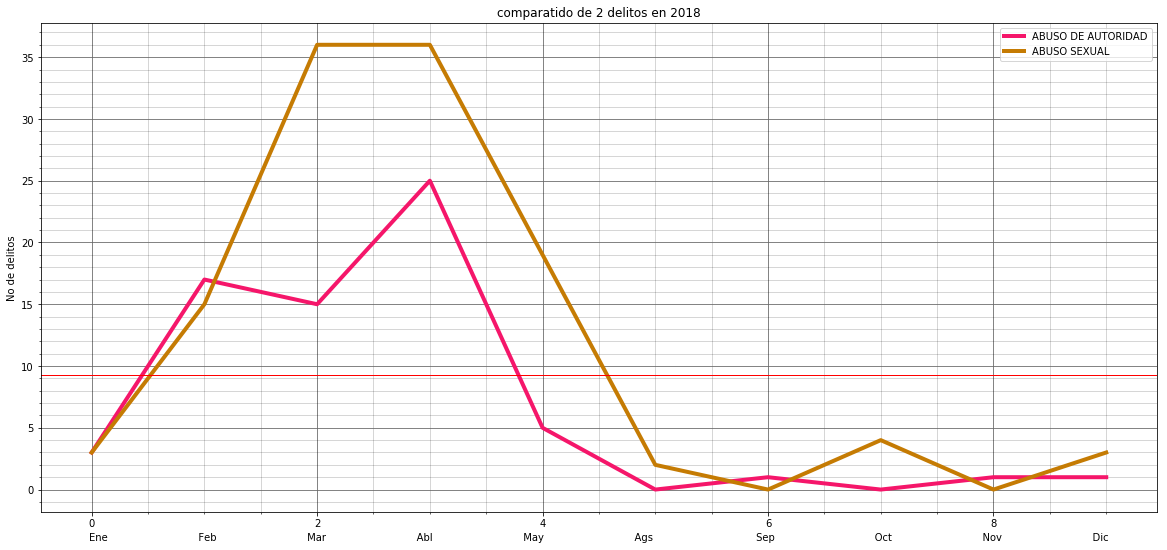

In [29]:
incidencia2 = pd.DataFrame.transpose(Delitosxmes)

deli=[]
i=1
while 0<i and i<177:
    try:
        print(f'Ingresa el ID Delito \ndebe ser un numero entre 1 y {len(dict_columns)} \nque deses agregar a la grafica 2018')
        i=int(input('O un numero negativo para ver la grafica\n'))
    except:
        print("ingresa un numero entre 1 y ", len(dict_columns))
        i=1
        continue
    if 0<i and i<177:
        deli.append(dict_columns[i])

#Las gráficas apreceran automáticamente incrustadas en el notebook
%matplotlib inline

# Definir los datos eje x, eje y
#incidencia = pd.DataFrame.transpose(Delitosxmes.loc[['ABANDONO DE PERSONA'], :])
incidencia = incidencia2[deli]

horas = list(range(len(incidencia)))

# gráfico
# Configurar las caracteristicas del grafico
i=[-1]
def suma():
    i[0]=i[0]+1
    return i[0]

plt.figure(figsize=(20,9))
for h in range(len(deli)):    
    plt.plot(horas, incidencia[deli[h]], label = deli[h], linewidth = 4, color = (random.random(), random.random(), random.random()))
plt.axhline(y=np.mean(incidencia.mean()), linewidth=1, color='r')
#Definir nombres de ejes y titulo
plt.xlabel('Ene                             Feb                             Mar                             Abl                             '
           'May                             Ags                                 Sep                                Oct                             '
           'Nov                             Dic')
plt.ylabel('No de delitos')
plt.title(f'comparatido de {len(deli)} delitos en 2018')
#Mostrar leyenda, cuadricula y figura
plt.legend()
plt.minorticks_on()
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.grid(b=True, which='minor', color='black', linestyle='-', alpha=0.2)
plt.show()



In [30]:
users_columns.head(1)

datasetid  \
0  carpetas-de-investigacion-pgj-cdmx   

                                              delito  \
0  ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...   

                       categoria_delito         fecha_hechos  \
0  ROBO DE VEHÍCULO CON Y SIN VIOLENCIA  2016-05-01 21:00:00   

          fecha_inicio alcaldia_hechos agencia  \
0  2016-05-03 00:36:45  MIGUEL HIDALGO    MH-2   

                          fiscalia unidad_investigacion   colonia_hechos  \
0  INVESTIGACIÓN EN MIGUEL HIDALGO               UI-2CD  LOMAS DE SOTELO   

          calle_hechos           Esquina mes_hechos  \
0  PRESA DE LA AMISTAD  PRESA DON MARTIN       Mayo   

               fields.geopoint  fields.latitud  fields.longitud  \
0  [19.4471959998, -99.210664]       19.447196       -99.210664   

          geometry.coordinates geometry.type  
0  [-99.210664, 19.4471959998]         Point

In [31]:
cf.go_offline() #todos los graficos sean de forma local en el cpu

In [32]:
incidencia2.head()

ABANDONO DE PERSONA  ABORTO  ABUSO DE AUTORIDAD  ABUSO DE CONFIANZA  \
Enero                    0.0     0.0                 3.0                13.0   
Febrero                  6.0     2.0                17.0                28.0   
Marzo                    6.0     3.0                15.0                25.0   
Abril                    0.0     0.0                25.0                28.0   
Mayo                     0.0     1.0                 5.0                17.0   

         ABUSO SEXUAL  ALLANAMIENTO DE MORADA  AMENAZAS  \
Enero             3.0                     0.0      22.0   
Febrero          15.0                     3.0     126.0   
Marzo            36.0                    10.0     165.0   
Abril            36.0                    12.0     144.0   
Mayo             19.0                     8.0      62.0   

         ATAQUE A LAS VIAS DE COMUNICACION (DAÑO A VIAS O MEDIOS DE TRANSPORTE)  \
Enero                                                  0.0                        
Febrero                                                3.0                        
Marzo                                                  5.0                        
Abril                                                  4.0                        
Mayo                                                   1.0                        

         COHECHO  CONTRA FUNCIONARIOS PUBLICOS  ...  \
Enero        1.0                           0.0  ...   
Febrero      3.0                          12.0  ...   
Marzo        4.0                          10.0  ...   
Abril        6.0                          14.0  ...   
Mayo         1.0                           2.0  ...   

         RESPONSABILIDAD PROFESIONAL  ROBO A PASAJERO EN RTP CON VIOLENCIA  \
Enero                            2.0                                   0.0   
Febrero                          1.0                                   1.0   
Marzo                            0.0                                   0.0   
Abril                            0.0                                   0.0   
Mayo                             0.0                                   0.0   

         ROBO A TRANSPORTISTA Y VEHICULO PESADO SIN VIOLENCIA  \
Enero                                                  0.0      
Febrero                                                1.0      
Marzo                                                  0.0      
Abril                                                  0.0      
Mayo                                                   0.0      

         USURPACION DE FUNCIONES  VIOLACION DE CORRESPONDENCIA  \
Enero                        0.0                           0.0   
Febrero                      2.0                           1.0   
Marzo                        0.0                           0.0   
Abril                        0.0                           0.0   
Mayo                         0.0                           0.0   

         VIOLACION EQUIPARADA  COACCION DE SERVIDORES PUBLICOS  \
Enero                     0.0                              0.0   
Febrero                   1.0                              0.0   
Marzo                     0.0                              0.0   
Abril                     0.0                              0.0   
Mayo                      0.0                              1.0   

         ROBO A PASAJERO EN ECOBUS SIN VIOLENCIA  \
Enero                                        0.0   
Febrero                                      0.0   
Marzo                                        0.0   
Abril                                        0.0   
Mayo                                         1.0   

         INTIMIDACION (EVITAR DENUNCIA, APORTE INFORMACIÓN O PRUEBAS)  \
Enero                                                  1.0              
Febrero                                                0.0              
Marzo                                                  0.0              
Abril                                                  0.0              
Mayo       

In [33]:
incidencia2.iplot(kind='scatter')

In [34]:
incidencia2.iplot(kind='bar', yTitle='Numero de delitos por mes', title='Incidencia delictiva',
             filename='cufflinks/categorical-bar-chart')

In [35]:
incidencia2.iplot(kind='bar', barmode='stack', filename='cufflinks/grouped-bar-chart')

In [36]:
incidencia2.iplot(kind='barh',barmode='stack', bargap=.1, filename='cufflinks/barh')

In [37]:
delitos=users_columns
delitos

datasetid  \
0     carpetas-de-investigacion-pgj-cdmx   
1     carpetas-de-investigacion-pgj-cdmx   
2     carpetas-de-investigacion-pgj-cdmx   
3     carpetas-de-investigacion-pgj-cdmx   
4     carpetas-de-investigacion-pgj-cdmx   
5     carpetas-de-investigacion-pgj-cdmx   
6     carpetas-de-investigacion-pgj-cdmx   
7     carpetas-de-investigacion-pgj-cdmx   
8     carpetas-de-investigacion-pgj-cdmx   
9     carpetas-de-investigacion-pgj-cdmx   
10    carpetas-de-investigacion-pgj-cdmx   
11    carpetas-de-investigacion-pgj-cdmx   
12    carpetas-de-investigacion-pgj-cdmx   
13    carpetas-de-investigacion-pgj-cdmx   
14    carpetas-de-investigacion-pgj-cdmx   
15    carpetas-de-investigacion-pgj-cdmx   
16    carpetas-de-investigacion-pgj-cdmx   
17    carpetas-de-investigacion-pgj-cdmx   
18    carpetas-de-investigacion-pgj-cdmx   
19    carpetas-de-investigacion-pgj-cdmx   
20    carpetas-de-investigacion-pgj-cdmx   
21    carpetas-de-investigacion-pgj-cdmx   
22    carpetas-de-investigacion-pgj-cdmx   
23    carpetas-de-investigacion-pgj-cdmx   
24    carpetas-de-investigacion-pgj-cdmx   
25    carpetas-de-investigacion-pgj-cdmx   
26    carpetas-de-investigacion-pgj-cdmx   
27    carpetas-de-investigacion-pgj-cdmx   
28    carpetas-de-investigacion-pgj-cdmx   
29    carpetas-de-investigacion-pgj-cdmx   
...                                  ...   
9640  carpetas-de-investigacion-pgj-cdmx   
9641  carpetas-de-investigacion-pgj-cdmx   
9642  carpetas-de-investigacion-pgj-cdmx   
9643  carpetas-de-investigacion-pgj-cdmx   
9644  carpetas-de-investigacion-pgj-cdmx   
9645  carpetas-de-investigacion-pgj-cdmx   
9646  carpetas-de-investigacion-pgj-cdmx   
9647  carpetas-de-investigacion-pgj-cdmx   
9648  carpetas-de-investigacion-pgj-cdmx   
9649  carpetas-de-investigacion-pgj-cdmx   
9650  carpetas-de-investigacion-pgj-cdmx   
9651  carpetas-de-investigacion-pgj-cdmx   
9652  carpetas-de-investigacion-pgj-cdmx   
9653  carpetas-de-investigacion-pgj-cdmx   
9654  carpetas-de-investigacion-pgj-cdmx   
9655  carpetas-de-investigacion-pgj-cdmx   
9656  carpetas-de-investigacion-pgj-cdmx   
9657  carpetas-de-investigacion-pgj-cdmx   
9658  carpetas-de-investigacion-pgj-cdmx   
9659  carpetas-de-investigacion-pgj-cdmx   
9660  carpetas-de-investigacion-pgj-cdmx   
9661  carpetas-de-investigacion-pgj-cdmx   
9662  carpetas-de-investigacion-pgj-cdmx   
9663  carpetas-de-investigacion-pgj-cdmx   
9664  carpetas-de-investigacion-pgj-cdmx   
9665  carpetas-de-investigacion-pgj-cdmx   
9666  carpetas-de-investigacion-pgj-cdmx   
9667  carpetas-de-investigacion-pgj-cdmx   
9668  carpetas-de-investigacion-pgj-cdmx   
9669  carpetas-de-investigacion-pgj-cdmx   

                                                 delito  \
0     ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...   
1     DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...   
2                                                FRAUDE   
3                     LESIONES INTENCIONALES POR GOLPES   
4                                    VIOLENCIA FAMILIAR   
5                                    VIOLENCIA FAMILIAR   
6                                               DESPOJO   
7                                    VIOLENCIA FAMILIAR   
8                          ROBO A NEGOCIO SIN VIOLENCIA   
9     ROBO DE VEHICULO DE SERVICIO PARTICULAR CON VI...   
10                                              TORTURA   
11                                   DENUNCIA DE HECHOS   
12    DAÑO EN PROPIEDAD AJENA CULPOSA POR TRÁNSITO V...   
13       ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA   
14                  PERDIDA DE LA VIDA POR OTRAS CAUSAS   
15                                   VIOLENCIA FAMILIAR   
16                                              COHECHO   
17                            QUEBRANTAMIENTO DE SELLOS   
18                           ROBO DE ACCESORIOS DE AUTO   
19                                   VIOLENCIA FAMILIAR   
20    FALSIFICACION DE TITULOS AL PORTADOR Y DOCUMEN...   
21  

In [38]:
table = pd.pivot_table(users_columns, 
                       index=['categoria_delito'], 
                       
                       values = 'delito',
                       aggfunc={'delito':'count'}
                      )
table=table.sort_values(by=['delito'], ascending=False)
table.iplot(kind='barh',barmode='stack', bargap=.1, xTitle='Numero de delitos en 2018', title='Incidencia delictiva',
            filename='cufflinks/barh')


In [39]:
delitos.iplot(kind='scatter', mode='markers', x='mes_hechos', y='delito', filename='cufflinks/simple-scatter')

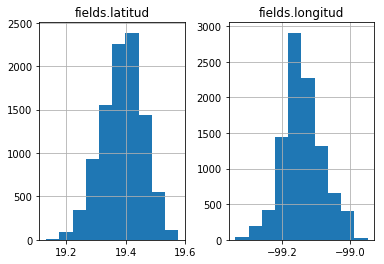

In [44]:
delitos.hist()
plt.show()

In [50]:
delitos.describe()
print(delitos['fields.latitud'].mode(),delitos['fields.longitud'].mode())
#[19.424399,-99.14775] del histograma resultante se observo que en este punto es donde se reporta un mayor numero de incidentes
#

0    19.424399
dtype: float64 0   -99.14775
dtype: float64


delito
categoria_delito                                          
DELITO DE BAJO IMPACTO                                7583
HECHO NO DELICTIVO                                     657
HOMICIDIO DOLOSO                                        52
LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO           30
ROBO A CASA HABITACIÓN CON VIOLENCIA                    29
ROBO A CUENTAHABIENTE SALIENDO DEL CAJERO CON V...      22
ROBO A NEGOCIO CON VIOLENCIA                           153
ROBO A PASAJERO A BORDO DE MICROBUS CON Y SIN V...      51
ROBO A PASAJERO A BORDO DE TAXI CON VIOLENCIA           13
ROBO A PASAJERO A BORDO DEL METRO CON Y SIN VIO...      21
ROBO A REPARTIDOR CON Y SIN VIOLENCIA                   89
ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIOL...     339
ROBO A TRANSPORTISTA CON Y SIN VIOLENCIA                11
ROBO DE VEHÍCULO CON Y SIN VIOLENCIA                   596
SECUESTRO                                                3
VIOLACIÓN                                               21

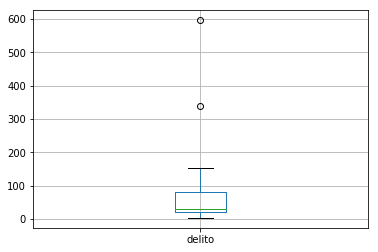

In [57]:
table = pd.pivot_table(users_columns, 
                       index=['categoria_delito'], 
                       
                       values = 'delito',
                       aggfunc={'delito':'count'}
                      )
table[2:].boxplot()

table

In [43]:
px=delitos
import plotly.express as px
tips = px.data.tips()
fig = px.box(tips, y="total_bill")
fig.show()

ModuleNotFoundError: No module named 'plotly.express'

In [42]:
#Genere un mapa en google maps donde se muestran los delitos en el 2018 en df 
#TIENES QUE ACERCAR EL MAPA CON LAS HERRAMIENTAS DE GOOGLE PARA VER CADA PUNTO CORRESPONDIENTE A UN DELITO
#DA CLICK SOBRE EL PUNTO PARA VER SU INFO
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time
navegador2 = webdriver.Chrome()
navegador2.get('https://drive.google.com/open?id=1mmf3oPkCRsK2wnOeQqouMSrHK7BGfRVB&usp=sharing')

from IPython.core.display import HTML
HTML('<iframe src="https://www.google.com/maps/d/u/0/embed?mid=1mmf3oPkCRsK2wnOeQqouMSrHK7BGfRVB" width="640" height="480"></iframe>')



In [41]:
%%html
<iframe src="https://www.google.com/maps/d/u/0/embed?mid=1mmf3oPkCRsK2wnOeQqouMSrHK7BGfRVB" width="640" height="480"></iframe>